In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv(r"/home/zsj/code/CSE587-Project-UsedCarPricePrediction/carinfo_after_pre_clean.csv")
df.head()

,Unnamed: 0,year,make,model,price,mileage,Miles per gallon,Transmission,owner,VIN,...,cylinders,fuel,Drive type,Miles per gallon equivalent (MPGe),Range (when new),Time to fully charge battery (240V),Motor,Bed Length,exterior_color,interior_color
0,0,2015,Subaru,Outback Limited,16998,92000,25 city/32 hwy,Automatic,2.0,4S4BSANC4F3279791,...,NaN,NaN,NaN,NaN,NaN,NaN,non-electric,NaN,Silver,Black
1,1,2017,Subaru,Forester 2.5I,16998,79000,22 city/28 hwy,Manual 6 Speed,1.0,JF2SJAACXHG452398,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Silver,Gray
2,2,2020,Subaru,Impreza,18998,43000,28 city/36 hwy,Automatic,1.0,4S3GKAB64L3608865,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Blue,Black
3,3,2016,Subaru,Legacy 2.5I,14998,91000,26 city/36 hwy,Automatic,3.0,4S3BNAA63G3004121,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Gray,Black
4,4,2021,Subaru,Crosstrek Premium,24998,53000,28 city/33 hwy,Automatic,1.0,JF2GTAEC8MH670080,...,4.0,Gas,All Wheel Drive,NaN,NaN,NaN,non-electric,NaN,Black,Black


**Data Cleaning for attributes: Accident / Damage, mileage, price**

In [2]:
df.columns.tolist()

['Unnamed: 0',
 'year',
 'make',
 'model',
 'price',
 'mileage',
 'Miles per gallon',
 'Transmission',
 'owner',
 'VIN',
 'class',
 'Auction Brand / Issues',
 'Accident / Damage',
 'Open Recall Check',
 'Odometer Check',
 'Certified Pre-Owned',
 'cylinders',
 'fuel',
 'Drive type',
 'Miles per gallon equivalent (MPGe)',
 'Range (when new)',
 'Time to fully charge battery (240V)',
 'Motor',
 'Bed Length',
 'exterior_color',
 'interior_color']

In [3]:
df_dmg=df.dropna(subset=['mileage','price','Accident / Damage']) # drop rows with NaN values in mileage, price or make
df_dmg = df_dmg[df_dmg['price']!=0] # drop rows with price equals to 0

In [4]:
value_counts = df_dmg['Accident / Damage'].value_counts()
value_counts

Accident / Damage
No Issue           7743
Minor              1117
Damage Reported    1026
Moderate            430
Minor-Moderate       23
Very Minor            2
Moderate-Severe       1
Name: count, dtype: int64

In [5]:
clean_car_data = df_dmg.loc[df_dmg['Accident / Damage'].isin(['No Issue'])]
minor_data = df_dmg.loc[df_dmg['Accident / Damage'].isin(['Minor', 'Very Minor'])]
moderate_data = df_dmg.loc[df_dmg['Accident / Damage'].isin(['Moderate', 'Minor-Moderate','Moderate-Severe'])]
damage_reported_data = df_dmg.loc[df_dmg['Accident / Damage'].isin(['Damage Reported'])]

# Question 7:  How do the accidents or damage records of the used cars affect the resale price? (Shijie)

**Hypothesis 1: the used cars with different damage levels share the similar pattern between mileage and price.**  

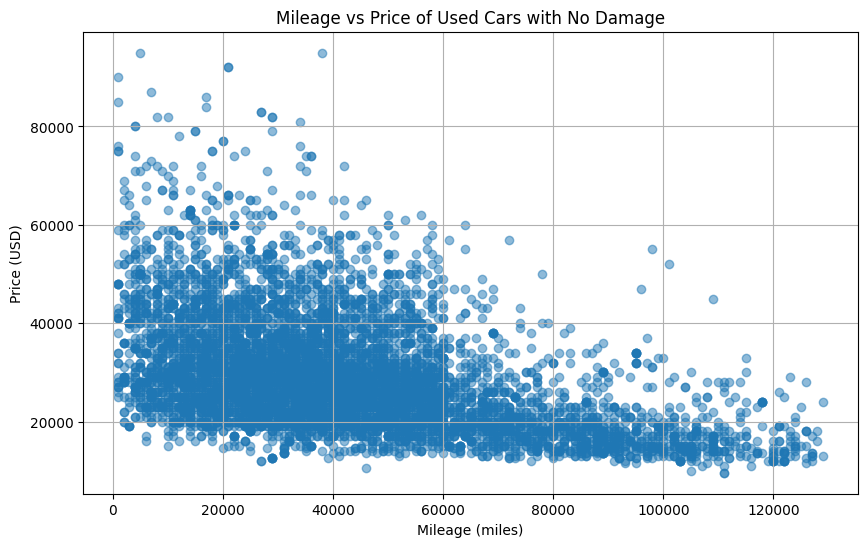

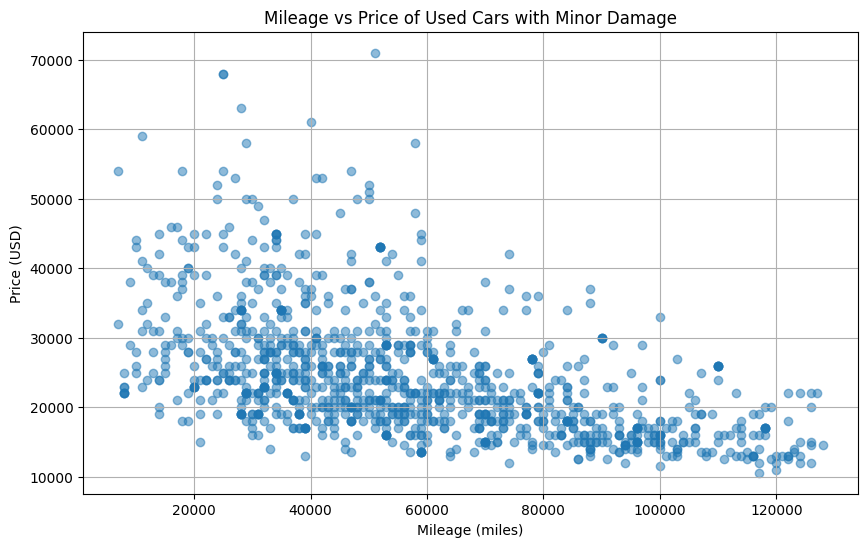

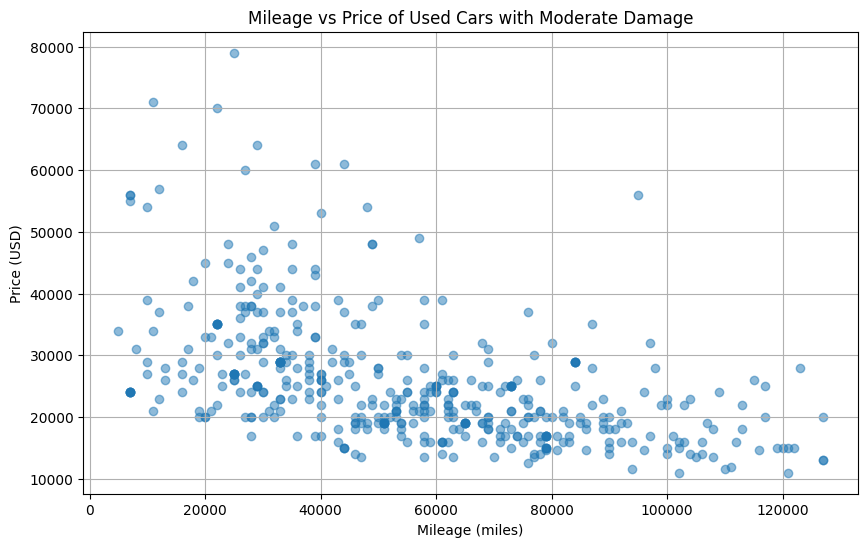

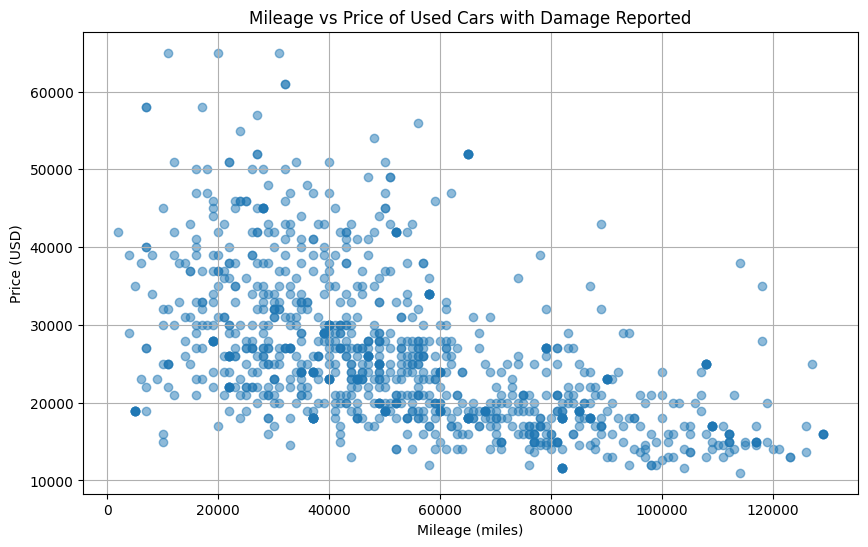

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(clean_car_data['mileage'],clean_car_data['price'],alpha=0.5)
plt.title('Mileage vs Price of Used Cars with No Damage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(minor_data['mileage'],minor_data['price'],alpha=0.5)
plt.title('Mileage vs Price of Used Cars with Minor Damage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(moderate_data['mileage'],moderate_data['price'],alpha=0.5)
plt.title('Mileage vs Price of Used Cars with Moderate Damage')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(damage_reported_data['mileage'],damage_reported_data['price'],alpha=0.5)
plt.title('Mileage vs Price of Used Cars with Damage Reported')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [7]:
# calcualte general correlation value between resale price and mileage with different damage levels
mileage_corr_no=clean_car_data['mileage'].corr(clean_car_data['price'])
mileage_corr_minor=minor_data['mileage'].corr(minor_data['price'])
mileage_corr_moderate=moderate_data['mileage'].corr(moderate_data['price'])
mileage_corr_report=damage_reported_data['mileage'].corr(damage_reported_data['price'])
print('Pearson correlation of used car with no damage:', mileage_corr_no)
print('Pearson correlation of used car with minor damage:',mileage_corr_minor)
print('Pearson correlation of used car with moderate damage:',mileage_corr_moderate)
print('Pearson correlation of used car with damage reported:',mileage_corr_report)

Pearson correlation of used car with no damage: -0.47140781824890604
Pearson correlation of used car with minor damage: -0.5117868757602223
Pearson correlation of used car with moderate damage: -0.5172322127037858
Pearson correlation of used car with damage reported: -0.520546544670029


From both plots and Pearson correlation values of used cars with different damage levels share the smilar pattern between mileage and price.

**Hypothesis 2: Used cars with higher damage level tend to have lower price.**

In [8]:
from sklearn.linear_model import LinearRegression
no_dmg_model = LinearRegression()
no_dmg_model.fit(clean_car_data['mileage'].to_numpy().reshape(-1, 1), clean_car_data['price'].to_numpy().reshape(-1, 1))
minor_dmg_model = LinearRegression()
minor_dmg_model.fit(minor_data['mileage'].to_numpy().reshape(-1, 1), minor_data['price'].to_numpy().reshape(-1, 1))
moderate_dmg_model = LinearRegression()
moderate_dmg_model.fit(moderate_data['mileage'].to_numpy().reshape(-1, 1), moderate_data['price'].to_numpy().reshape(-1, 1))
report_dmg_model = LinearRegression()
report_dmg_model.fit(damage_reported_data['mileage'].to_numpy().reshape(-1, 1), damage_reported_data['price'].to_numpy().reshape(-1, 1))

LinearRegression()

In [32]:
# no_dmg_pred=no_dmg_model.predict(clean_car_data['mileage'].to_numpy().reshape(-1, 1))
# minor_dmg_pred=minor_dmg_model.predict(minor_data['mileage'].to_numpy().reshape(-1, 1))
# moderate_dmg_pred=moderate_dmg_model.predict(moderate_data['mileage'].to_numpy().reshape(-1, 1))

# no_dmg_residuals=clean_car_data['price'].to_numpy().reshape(-1, 1) - no_dmg_pred
# no_dmg_std_residuals = np.std(no_dmg_residuals)
# clean_car_data_wo_outlier = clean_car_data[no_dmg_residuals > (3 * no_dmg_std_residuals)]

# minor_dmg_residuals=minor_data['price'].to_numpy().reshape(-1, 1) - minor_dmg_pred
# minor_dmg_std_residuals = np.std(minor_dmg_residuals)
# minor_car_data_wo_outlier = minor_data[minor_dmg_residuals > (3 * minor_dmg_std_residuals)]

# moderate_dmg_residuals=moderate_data['price'].to_numpy().reshape(-1, 1) - moderate_dmg_pred
# moderate_dmg_std_residuals = np.std(moderate_dmg_residuals)
# moderate_car_data_wo_outlier = moderate_data[moderate_dmg_residuals > (3 * moderate_dmg_std_residuals)]
# no_dmg_model = LinearRegression()
# no_dmg_model.fit(clean_car_data_wo_outlier['mileage'].to_numpy().reshape(-1, 1), clean_car_data_wo_outlier['price'].to_numpy().reshape(-1, 1))
# minor_dmg_model = LinearRegression()
# minor_dmg_model.fit(minor_car_data_wo_outlier['mileage'].to_numpy().reshape(-1, 1), minor_car_data_wo_outlier['price'].to_numpy().reshape(-1, 1))
# moderate_dmg_model = LinearRegression()
# moderate_dmg_model.fit(moderate_car_data_wo_outlier['mileage'].to_numpy().reshape(-1, 1), moderate_car_data_wo_outlier['price'].to_numpy().reshape(-1, 1))

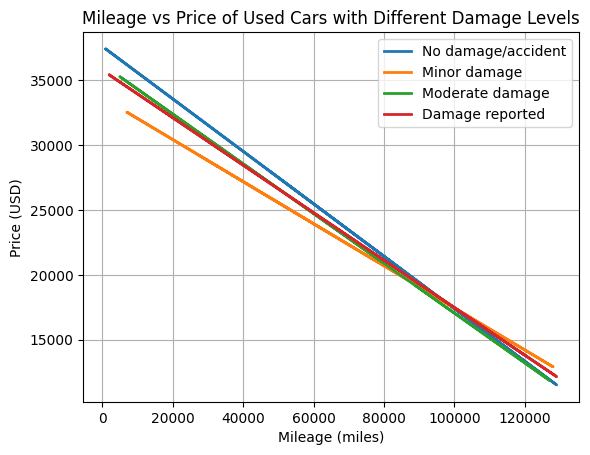

In [11]:

plt.plot(clean_car_data['mileage'], no_dmg_model.predict(clean_car_data['mileage'].to_numpy().reshape(-1, 1)), linewidth=2, label='No damage/accident')
plt.plot(minor_data['mileage'], minor_dmg_model.predict(minor_data['mileage'].to_numpy().reshape(-1, 1)), linewidth=2, label='Minor damage')
plt.plot(moderate_data['mileage'], moderate_dmg_model.predict(moderate_data['mileage'].to_numpy().reshape(-1, 1)), linewidth=2, label='Moderate damage')
plt.plot(damage_reported_data['mileage'], report_dmg_model.predict(damage_reported_data['mileage'].to_numpy().reshape(-1, 1)), linewidth=2, label='Damage reported')
plt.title('Mileage vs Price of Used Cars with Different Damage Levels')
plt.xlabel('Mileage (miles)')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

We can observe that in most of mileage range, used cars with damage will have lower resale price than cars with no damge/accident. 